In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing the data
df_train = pd.read_csv('all/train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
print('Number of numerical colummns : %d' % len(df_train.select_dtypes(include=['int', 'float']).columns))

Number of numerical colummns : 38


In [5]:
print('Number of categorical colummns : %d' % len(df_train.select_dtypes(exclude=['int', 'float']).columns))

Number of categorical colummns : 43


In [6]:
# Columns
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# SalePrice description
df_train['SalePrice'].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
plt.style.use('fivethirtyeight')

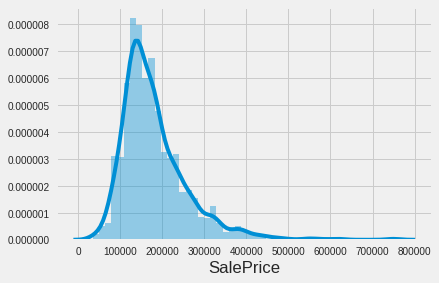

In [9]:
# Histogram
sns.distplot(df_train['SalePrice'])

In [10]:
# Skewness and Kurtosis
print('Skewness : %f' % df_train['SalePrice'].skew())
print('Kurtosis : %f' % df_train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


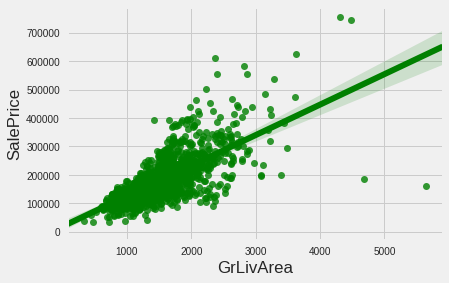

In [11]:
sns.regplot(df_train['GrLivArea'], df_train['SalePrice'], color= 'green')

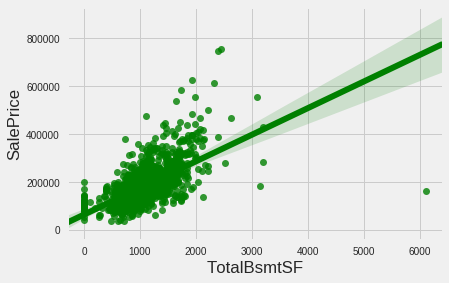

In [12]:
sns.regplot(df_train['TotalBsmtSF'], df_train['SalePrice'], color= 'green')

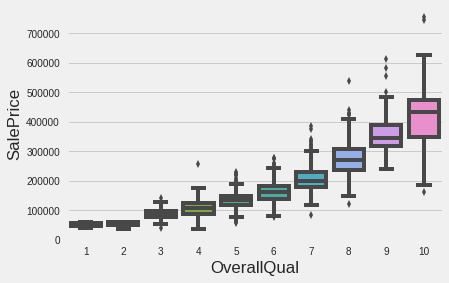

In [13]:
sns.boxplot(df_train['OverallQual'], df_train['SalePrice'])

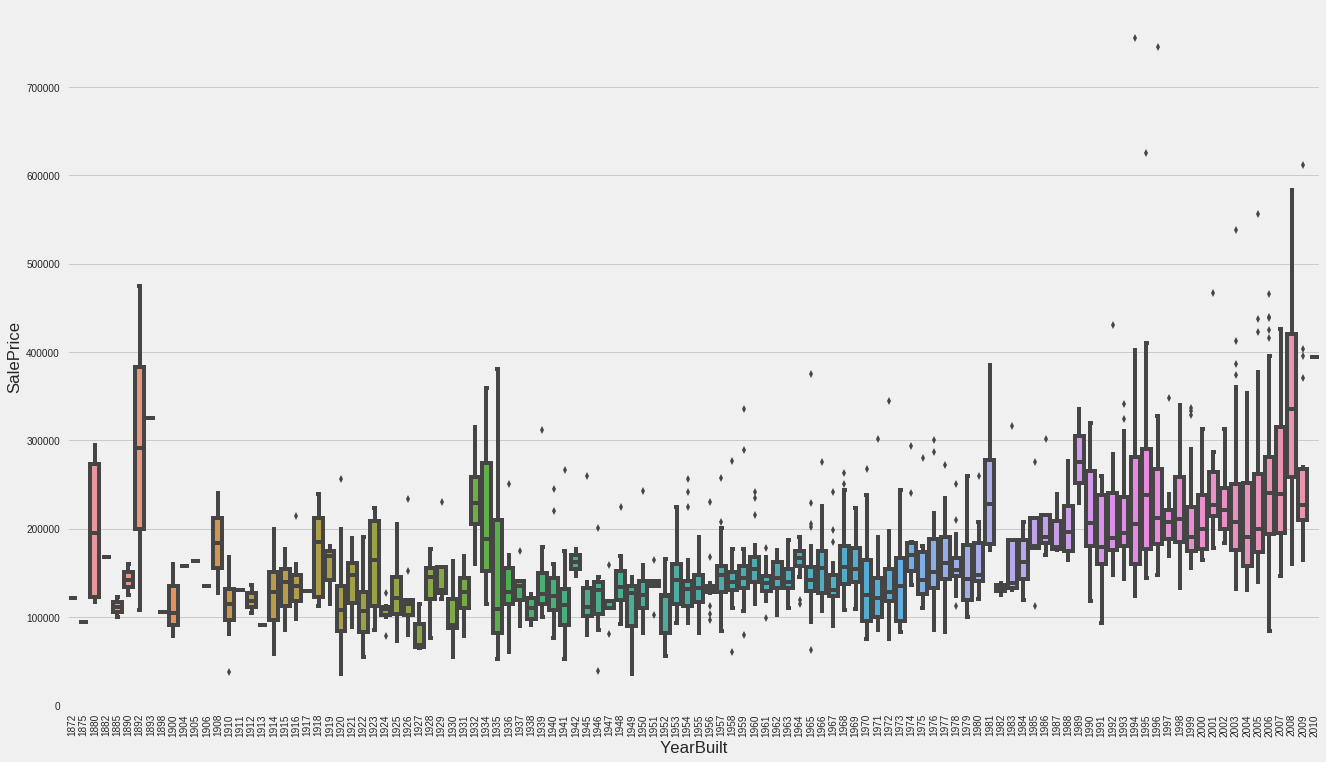

In [15]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation = 90)
sns.boxplot(df_train['YearBuilt'], df_train['SalePrice'])

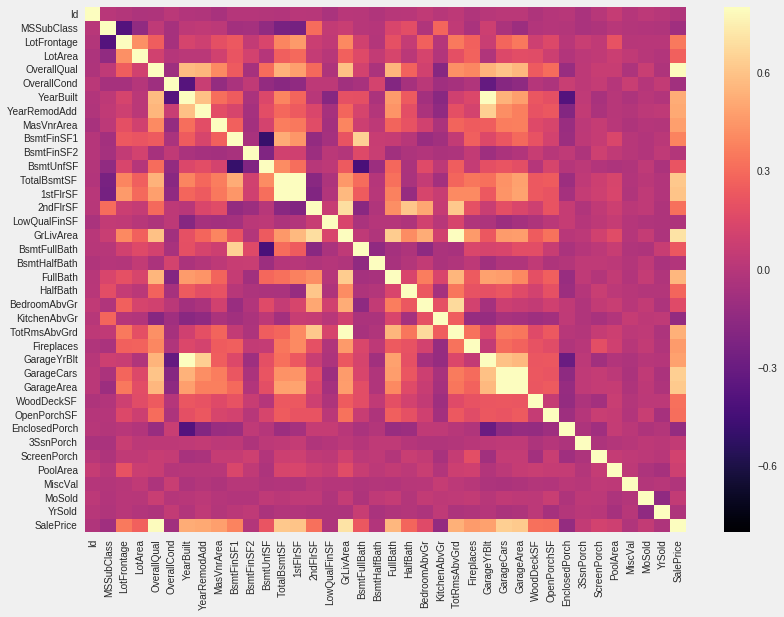

In [16]:
corrMatrix = df_train.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrMatrix, vmax=0.8, cmap='magma')

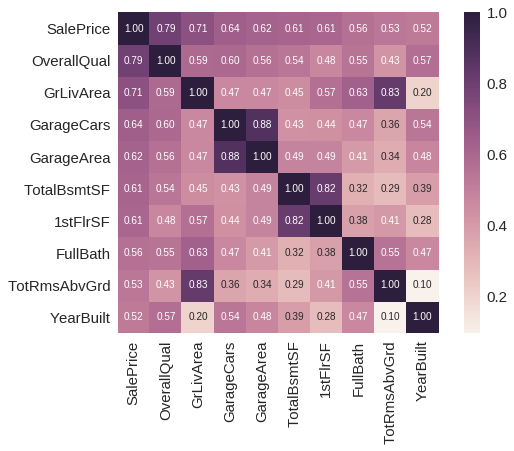

In [17]:
# Top 10 most correlated variables to SalePrice
k = 10
cols = corrMatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

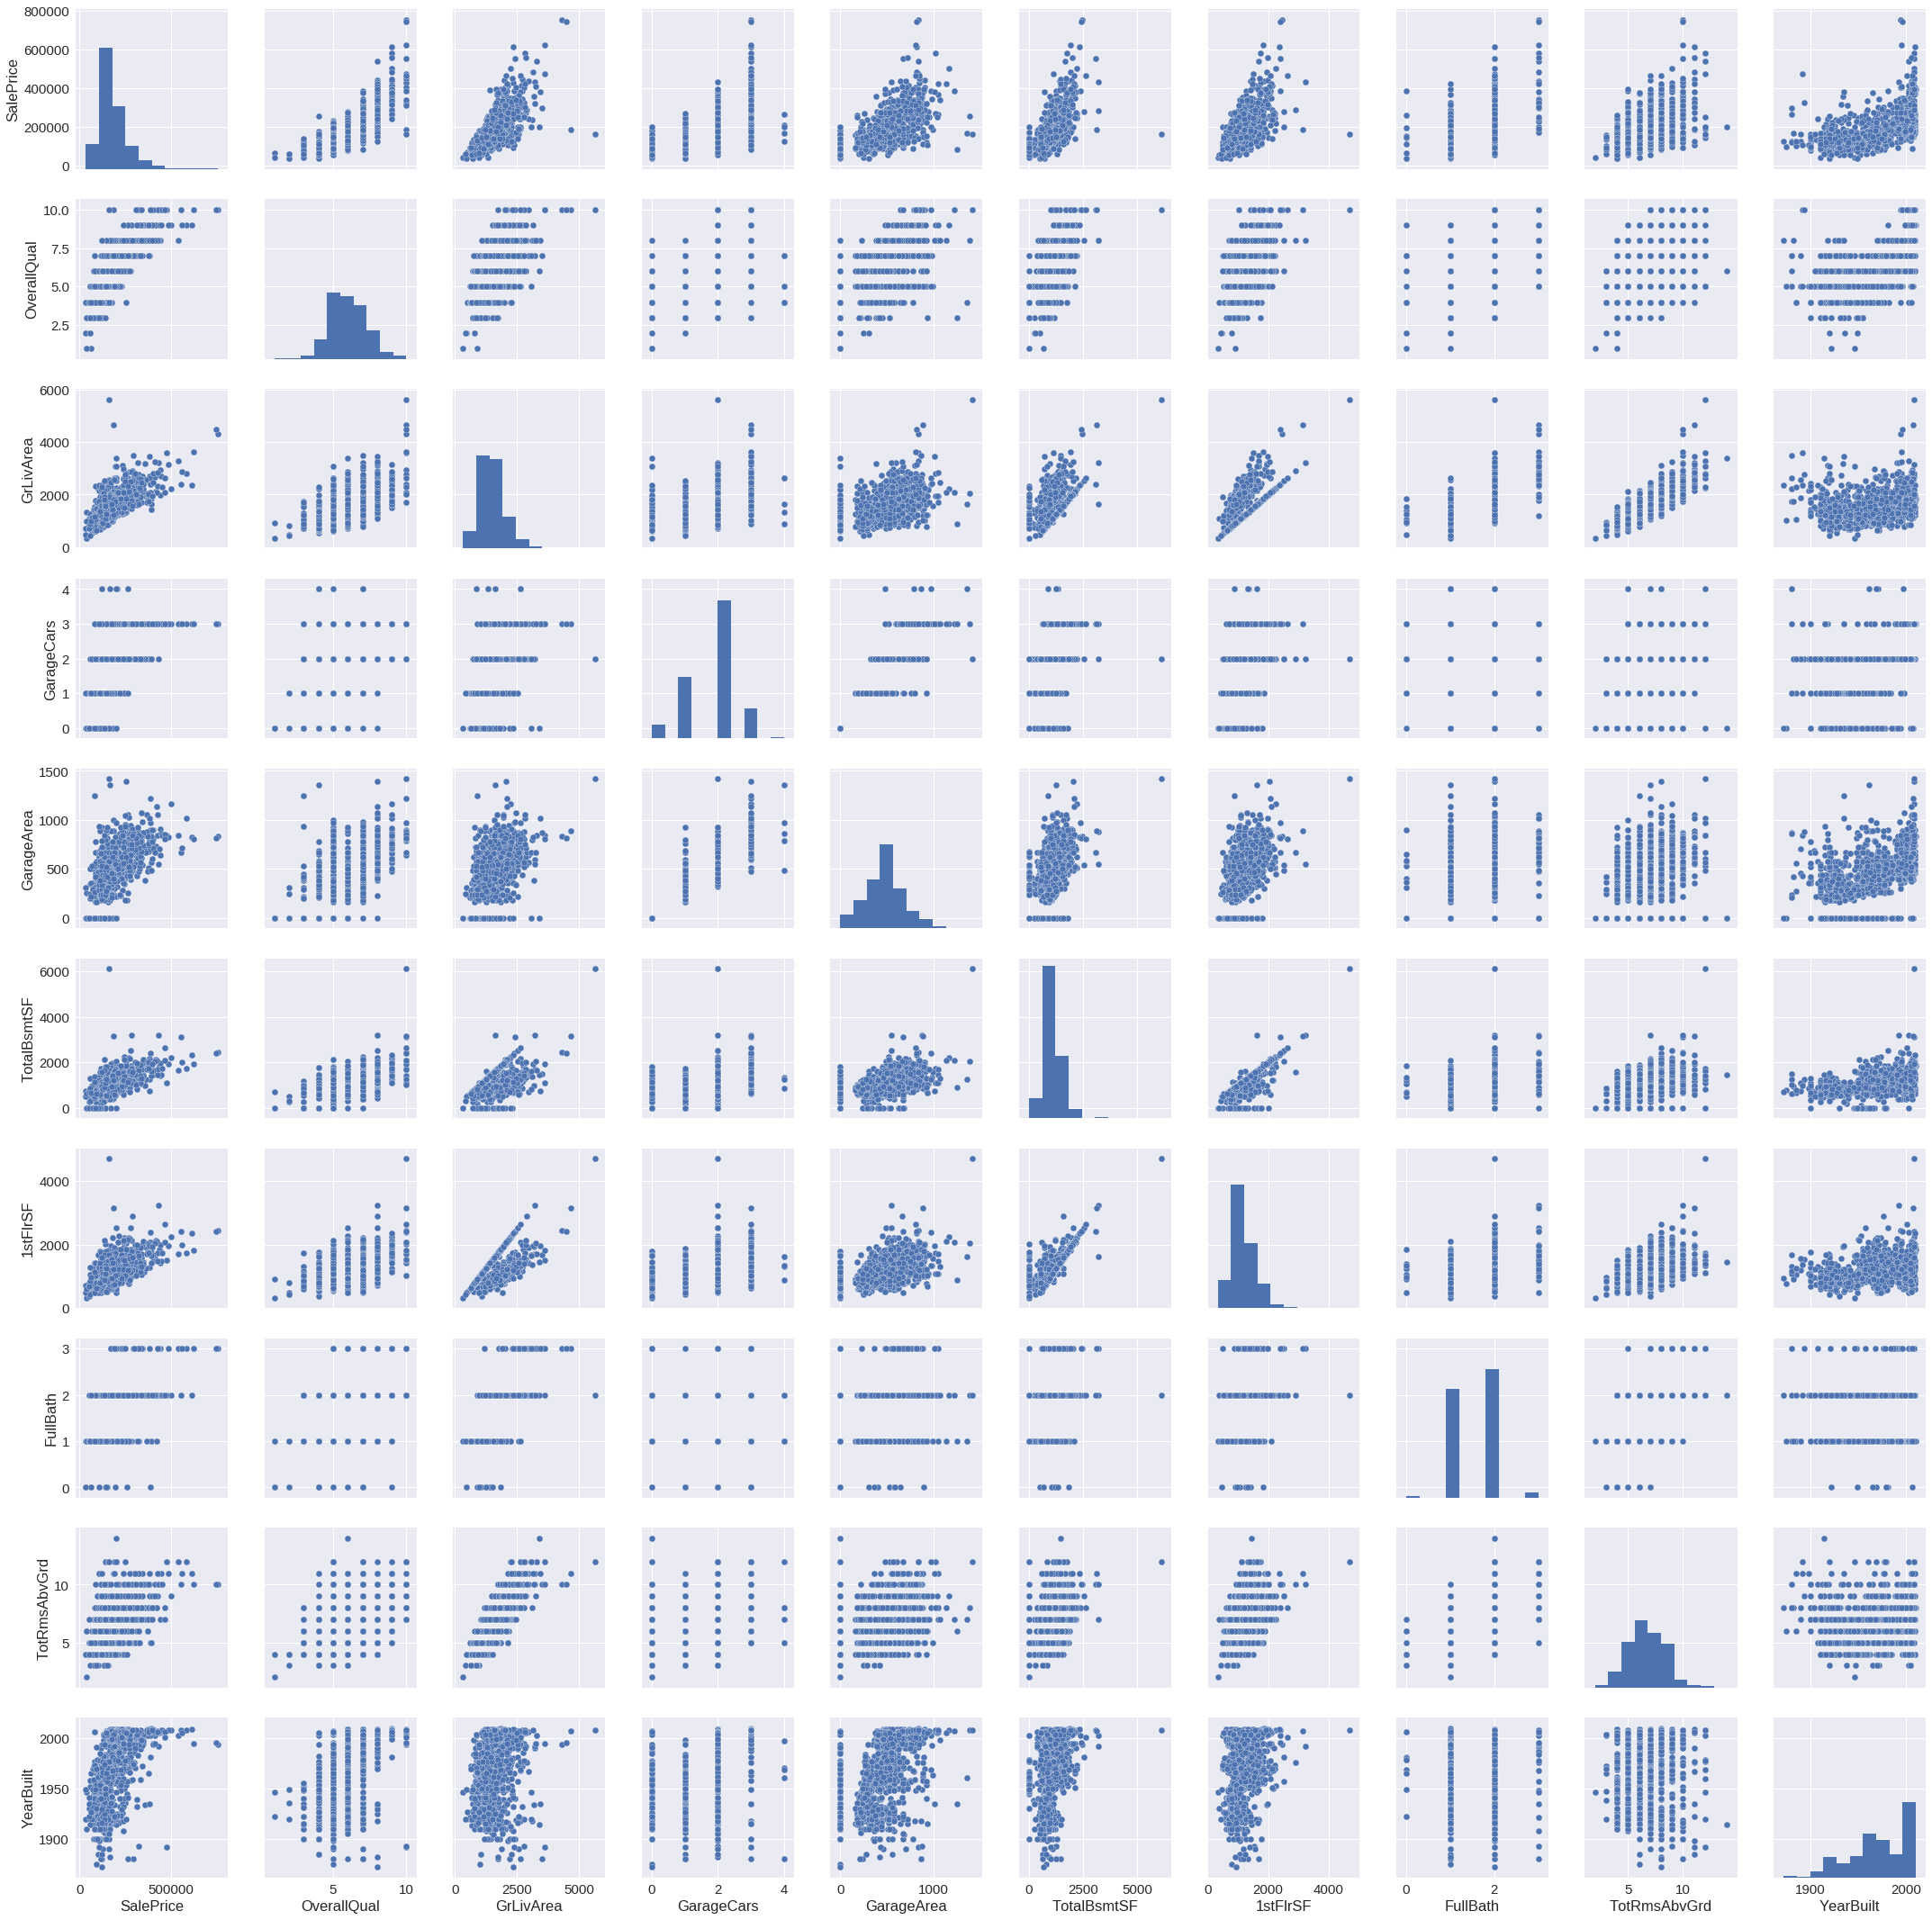

In [18]:
sns.pairplot(df_train[cols], kind='scatter', size = 3)

In [44]:
# Identifying missing values
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing = pd.concat([total, percent], axis =1, keys = ['Total', 'Percent'])
missing.head(n = 20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [ ]:
# Removing missing values
df_train = df_train.drop(missing[missing['Total'] > 1].index, axis =1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

In [75]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]

In [77]:
print('Low Range : \n')
print(low_range)
print('\nHigh Range : \n')
print(high_range)

Low Range : 

[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

High Range : 

[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


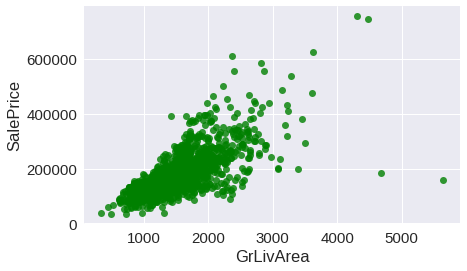

In [79]:
sns.regplot(df_train['GrLivArea'], df_train['SalePrice'], color= 'green', fit_reg=False)

In [80]:
## Getting the outliars Id
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [81]:
## Deleting the points
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

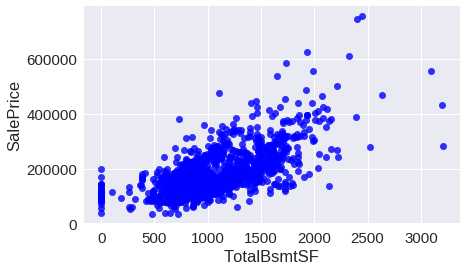

In [82]:
sns.regplot(df_train['TotalBsmtSF'], df_train['SalePrice'], fit_reg=False, color = 'blue')

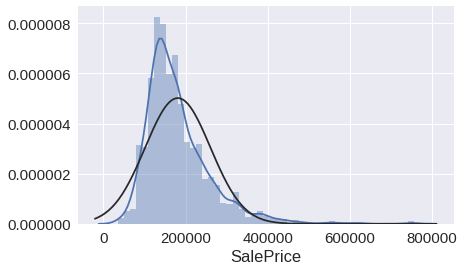

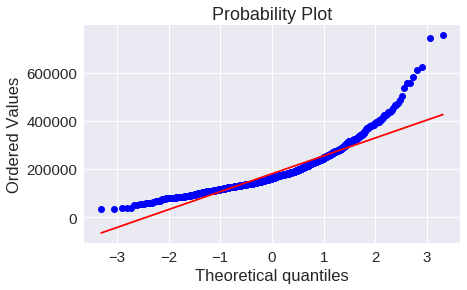

In [96]:
## Checking Linear Regression 

## 1) Normality

sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [97]:
## Applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

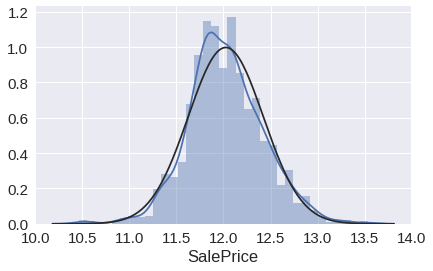

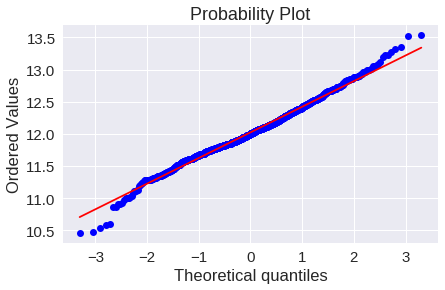

In [100]:
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

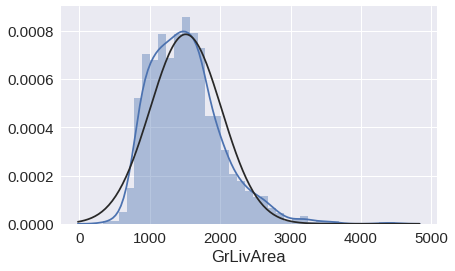

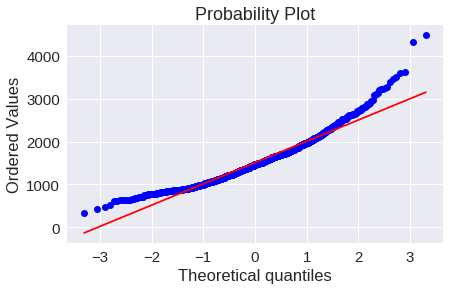

In [101]:
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

In [102]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

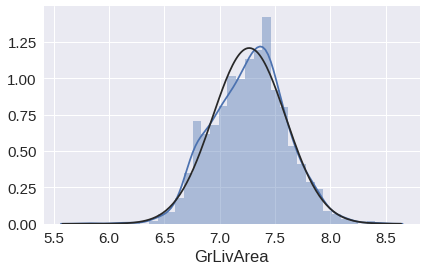

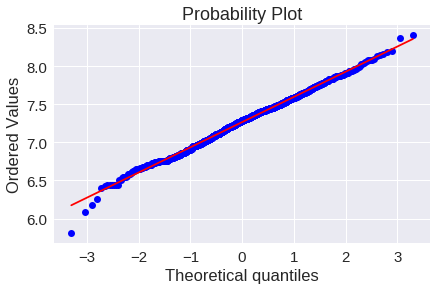

In [104]:
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

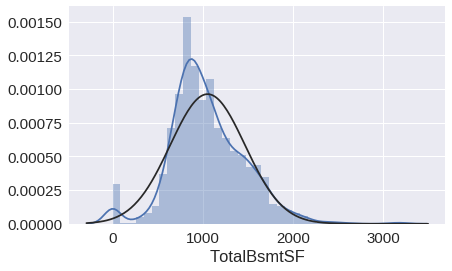

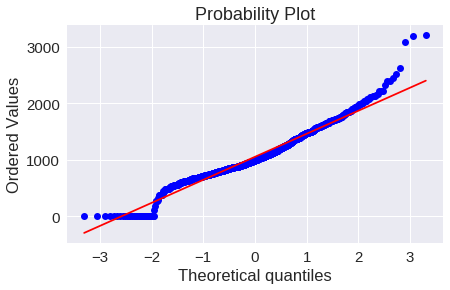

In [105]:
sns.distplot(df_train['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

In [108]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [111]:
tbsmt = df_train['TotalBsmtSF']
hbsmt = df_train['HasBsmt']

In [112]:
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'])

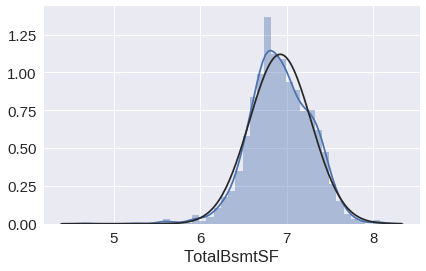

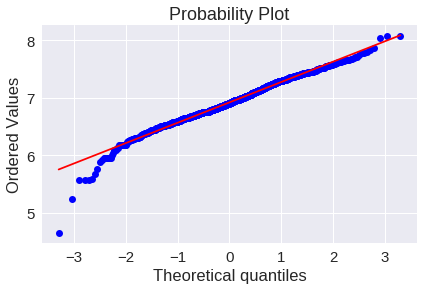

In [113]:
sns.distplot(df_train.loc[df_train['TotalBsmtSF'] > 0, 'TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train.loc[df_train['TotalBsmtSF'] > 0, 'TotalBsmtSF'], plot = plt)

In [114]:
df_train = pd.get_dummies(df_train)